# Bypass reactor demo
This notebook demonstrates the use of a bypass reactor in PyReactorKit.  
Based on input composition and flow, it will converge the bypass fraction to match a given maximum temperature.

In [20]:
from pyreactorkit.models import BypassReactor
from pyreactorkit.util import cos_profile
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(0, 50e-3, 1000)
power = 1000
reactor = BypassReactor(T_max_target=5000, T_tolerance=50, 
                        T0=300, pressure=50e2, mass_flow_rate_slm=20, 
                          X0={"CO2": 1}, 
                          z=z, dz = np.diff(z)[0])

heating_profile = cos_profile(z, 5e-3, 3e-3, sum=power)
reactor.set_heating_profile(heating_profile=heating_profile, U_heatloss=1e2)

(solarr,), _, parameters = reactor.converge()

Iteration 0
 bypass fraction: 90.7%
 resulted in temperature 4275K (target 5000K)
Iteration 1
 bypass fraction: 92.2%
 resulted in temperature 4519K (target 5000K)
Iteration 2
 bypass fraction: 93.0%
 resulted in temperature 4825K (target 5000K)
Iteration 3
 bypass fraction: 93.3%
 resulted in temperature 5009K (target 5000K)
Converged after 3 iterations


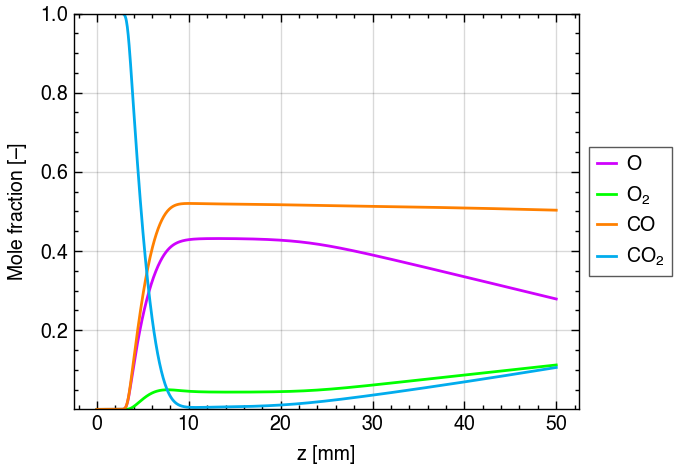

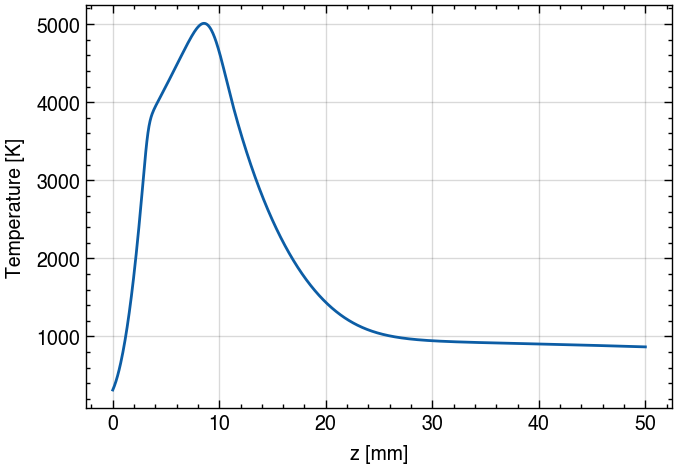

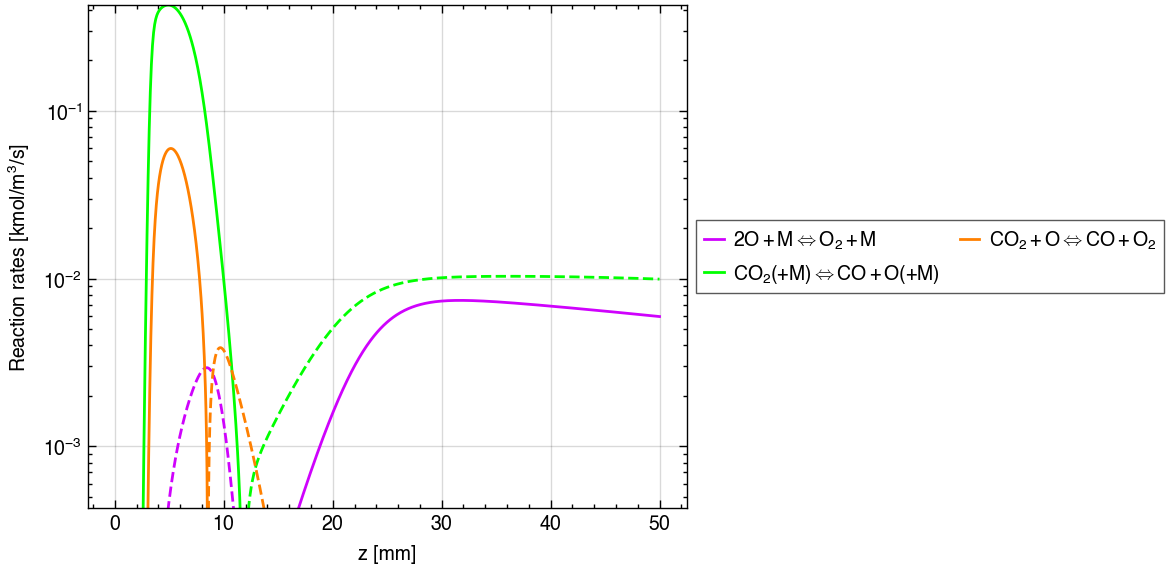

In [21]:
from pyreactorkit.display import plot_species, plot_temperature, plot_reactions

plot_species(solarr, xaxis="z")
plot_temperature(solarr, xaxis="z")

plt.figure(figsize=(6, 3))
plot_reactions(solarr, ax=plt.gca(), legend_opts={"ncols": 2}, xaxis="z")